In [2]:
target_url = 'https://raw.githubusercontent.com/Cosmic-rare/result-database-jupyter/main/targets/fastlate.png'

In [3]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io

In [4]:
def openImg(url):
  return Image.open(io.BytesIO(requests.get(url).content))

In [5]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [6]:
img = openImg(target_url)
rgb_img = img.convert('RGB')
size = rgb_img.size

In [7]:
# crop_img = rgb_img.crop([0, size[1] / 2, size[0] / 3 * 2, size[1] / 8 * 7])

crop_img = rgb_img
crop_size = crop_img.size

In [8]:
img2 = Image.new('RGBA', crop_size)

color_range = 25

for x in range(crop_size[0]):
  for y in range(crop_size[1]):
    r, g, b = crop_img.getpixel((x, y))

    if 114-color_range < r < 144+color_range and 241-color_range < g < 241+color_range and 219-color_range < b < 219+color_range:
        a = 0
    elif 108-color_range < r < 108+color_range and 193-color_range < g < 193+color_range and 190-color_range < b < 190+color_range:
        a = 0
    if 115-color_range < r < 115+color_range and 233-color_range < g < 233+color_range and 215-color_range < b < 215+color_range:
        a = 0
    else:
        a = 225

    img2.putpixel((x, y), (a, a, a, 255))

    # for i in range(-2, 3):
    #     for j in range(-2, 3):
    #         try:
    #             img2.putpixel((x+i, y+j), (a, a, a, 255))
    #         except:
    #             pass

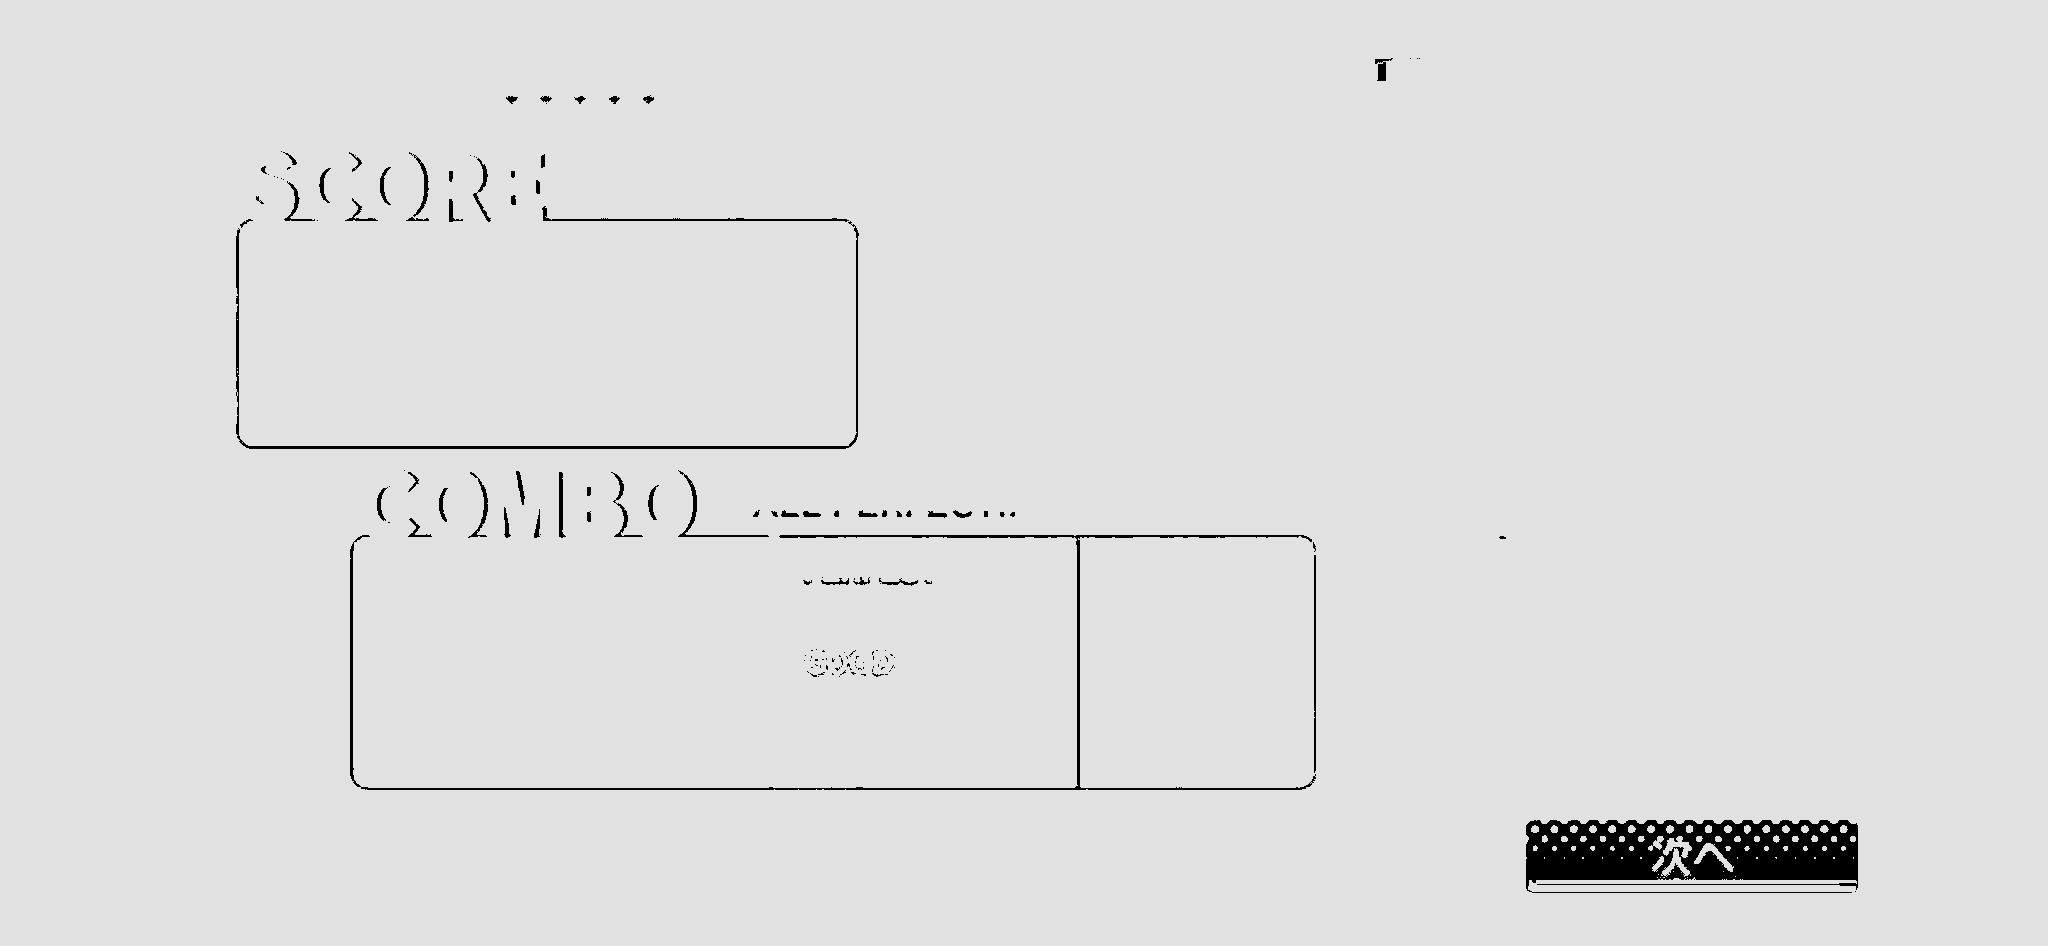

In [9]:
img2

In [10]:
builder = pyocr.builders.TextBuilder(tesseract_layout=11)
builder.tesseract_configs.append("-c")
builder.tesseract_configs.append('tessedit_char_whitelist="1234567890PERFECTGAODBMISFUL!"')
result = tool.image_to_string(crop_img, lang="eng", builder=builder)